# ECON 325: Distributions

* **Authors**: COMET Team (Valeria Zolla, Colby Chambers, Jonathan Graves)
* **Last Update**: 12 August 2022 

---

## Outline

### Prerequisites

* Introduction to Jupyter
* Introduction to R 
* Introduction to Visualization
* Central Tendency

### Outcomes

After completing this notebook, you will be able:
* Understand and work with Probability Density Functions (PDFs) and Cumulative Density Functions (CDF)
* Use tables to find joint, marginal, and conditional probabilities
* Interpret uniform, normal, and $t$ distributions

### References

* [Introduction to Probability and Statistics Using R](https://mran.microsoft.com/snapshot/2018-09-28/web/packages/IPSUR/vignettes/IPSUR.pdf)

## Introduction

This notebook will explore in detail the concept of distributions, both in terms of their functional forms for probability and how they are representative of different sets of data. This notebook aims to help us develop a deeper understanding of statistics from the perspective of data spread. Let's first load our reliable friend, the 2016 Census from Statistics Canada, which we will consult throughout this lesson.

In [1]:
# loading in our packages
library(tidyverse)
library(haven)
library(digest)

source("testing_distribution.r")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

Warning message:
“package ‘ggplot2’ was built under R version 4.1.3”
Warning message:
“package ‘tidyr’ was built under R version 4.1.2”
Warning message:
“package ‘readr’ was built under R version 4.1.2”
Warning message:
“package ‘dplyr’ was built under R version 4.1.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘haven’ was built under R version 4.1.3”
Warning message:
“package ‘testthat’ was built under R version 4.1.3”

Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from 

In [2]:
# reading in the data

census_data <- read_dta("../datasets/01_census2016.dta")

# cleaning up factors
census_data <- as_factor(census_data)

# cleaning up missing data
census_data <- filter(census_data, !is.na(census_data$wages))
census_data <- filter(census_data, !is.na(census_data$mrkinc))

# inspecting the data
glimpse(census_data)

Rows: 343,063
Columns: 16
$ ppsort  <dbl> 453141, 732612, 143665, 52611, 36927, 268123, 700087, 488335, …
$ agegrp  <fct> 35 to 39 years, 40 to 44 years, 55 to 59 years, 50 to 54 years…
$ ageimm  <fct> not applicable, not applicable, not applicable, not applicable…
$ cip2011 <fct> "08 architecture, engineering, and related technologies", "06 …
$ fol     <fct> english only, english only, french only, french only, english …
$ hdgree  <fct> "certificate of apprenticeship or certificate of qualification…
$ immstat <fct> non-immigrants, non-immigrants, non-immigrants, non-immigrants…
$ kol     <fct> english only, both english and french, both english and french…
$ lfact   <fct> employed - worked in reference week, employed - worked in refe…
$ locstud <fct> ontario, ontario, prince edward island, quebec, not applicable…
$ mrkinc  <dbl> 97000, 41000, 30000, 54000, 27000, 40000, 69000, 56000, 24000,…
$ pkids   <fct> one or more, one or more, none, none, one or more, one or more…
$ pr      <fct

Now that we have our data set ready on stand-by for analysis, let's start looking at distributions as a concept more generally.

## Part 1: Distribution Functions - The Basics


Let's begin with a quick review of some basic ideas from probability theory.

### What is a Probability?

When working with data, the **probability** of seeing a particular piece of data take on a certain set of values (called an **event**) is the **likelihood** of those values occurring.  When the possible values are discrete (e.g. `1,2,3` or `adult, child`), we refer to this as the **frequency**.  When the possible values are continuous (e.g. any number between `0.5` and `3.75`), we refer to this as the **density**.  We learn a little bit more about this later in this notebook.

There is a difference between _population_ probabilities and _empirical_ or _sample_ probabilities.  Generally, when we talk about distributions we will be referring to _population_ objects: but there are also sample versions as well, which are often easier to think about.

For instance, let's say we have a dataset with 5,000 observations and a variable called `birthmonth` which records the month of birth of every participant captured in the dataset. If 500 people in the data were born in October, then `birthmonth=="October`" would have an _empirical_ probability of occurring in an observation 10% of the time.  We can't be sure what the population probability would be, unless we knew more about the population.
 
### What is a Random Variable?

A **random variable** is a variable whose possible values are numerical outcomes of a random phenomenon, such as rolling a dice or surveys done to random people in certain locations at certain times. There are two types of random variables: discrete and continuous.

- A **discrete random variable** is one which may take on only a finite number of distinct values. Examples of discrete random variables include the options when you roll dice, the number of children in a family, or the number of defective light bulbs in a box of ten. A good example of a discrete random variable of the data used in this notebook is the age group (`agegrp` in the data) of the census participants as it can take only a finite number of distinct values: 17 different categories to be exact. 

- A **continuous random variable** is one which takes an infinite number of possible values. We can commonly think of this variable as being one that is *measured* rather than merely *categorized*. Examples include height, weight, or how much people earn. In the data, we can see that `wages` and `mrkinc` are great examples of continuous random variables. They can take on an infinite number of possible values.

Now that we've learned some key terminology for describing variables and the values they can take on, we can work with distributions.


### What is the Probability Distribution?

A **probability distribution** refers to the pattern or arrangement of probabilities in a population.  These are usually described as _functions_: the function takes in a possible event, then reports back the probability of that event occurring.  As we explained above, there is a difference between _population_ and _sample_ distributions:
* A _population_ distribution (which is the typical way we describe these) describes population probabilities
* An _empirical_ or _sample_ distribution reports describes empirical probabilities from within a particular sample

It's important to keep this difference in mind: from the perspective of statistical inference, we usually want to learn about the _population_ distribution, but will use the _empirical_ distribution to do so.

Distribution functions come in several standard forms; let's learn about them.

#### Probability Density Functions (PDFs)
**Probability Density Functions** are also sometimes referred to as PDFs or probability mass functions.  We usually use lower case letters like $f$ or $p$ to describe these functions.

##### 1. Discrete PDF:

>" The probability distribution of a discrete random variable is the list of all possible values of the variable and their probabilities which sum to  1." 
> 
>\- Econometrics with R

In other words, a **Probability Density Function (PDF)** is the probability of occurrence of all the different values of a variable. The probability of occurrence is also called  **density** or **frequency**.

Suppose a random variable X may take k different values, with the probability that $X = x_{i} $ defined to be $ P(X = x_{i}) = p_{i} $. The probabilities $p_{i}$ must satisfy the following:
1. For each i:
$0<p_{i}<1 $ 

2. 
$p_{1} + p_{2} + ... + p_{k} = 1 $

There are two different ways to view the empirical PDF of a discrete variable. The first way is by creating a frequency table. 

In [3]:
census_data0 <- filter(census_data, agegrp != "not available")
sample_size <- nrow(census_data0) # number of observations
table2 <- census_data0 %>% 
    group_by(agegrp) %>%
    summarize(Count = n(),
              Frequency = n()/sample_size*100) # creates two variables in our table

table2

agegrp,Count,Frequency
<fct>,<int>,<dbl>
15 to 17 years,5411,1.589049624
18 to 19 years,9028,2.651254853
20 to 24 years,30758,9.032708990
25 to 29 years,35213,10.341009873
30 to 34 years,36690,10.774760806
35 to 39 years,36956,10.852877087
40 to 44 years,37213,10.928350337
45 to 49 years,38638,11.346830417
50 to 54 years,42610,12.513288578


A second way to visualize an empirical PDF is by creating a graph. Because a PDF has a finite number of distinct values of which we measure their frequency, the typical format to express a categorical array such as a PDF is through a bar graph following what we learned in _Introduction to Visualization_.

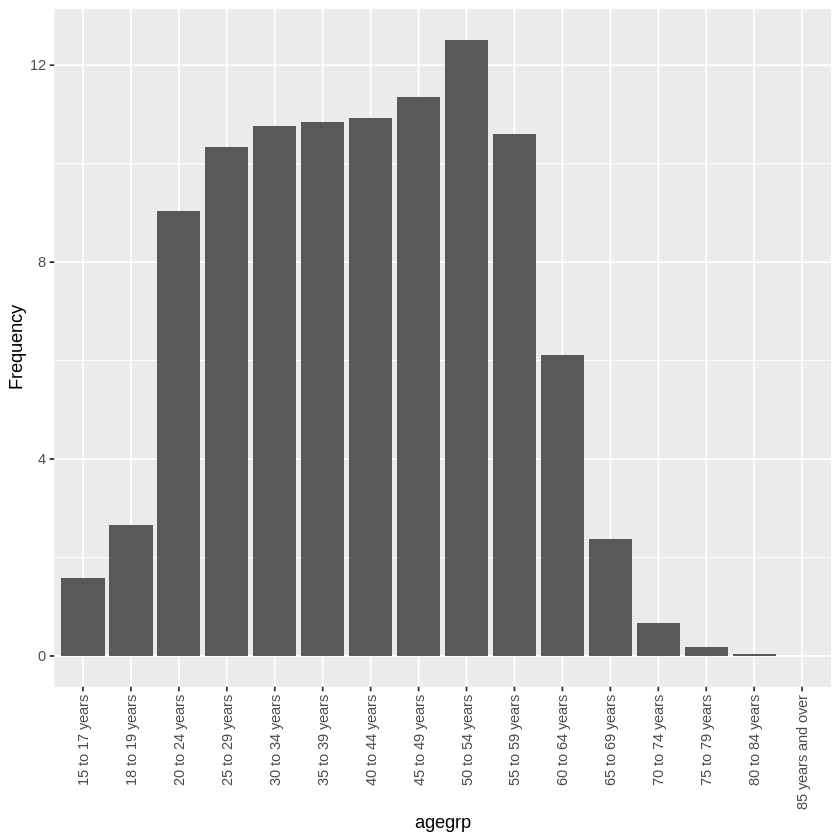

In [4]:
plot <- ggplot(data = table2,  # this declares the data for the chart; all variable names are in this data
                aes(# this is a list of the aesthetic features of the chart
                    x = agegrp,   # for example, the x-axis will be "year"
                    y = Frequency # the y-axes will be expenditure-based real GDP per capita
                ),
                ) 
plot1 <- plot + geom_col() + 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

plot1

#### 2. Continuous PDF:

>"Since a continuous random variable takes on a continuum of possible values, we cannot use the concept of a probability distribution as used for discrete random variables." 
>
> \- Econometrics with R


Unlike a discrete variable, a continuous random variable is not defined in specific values. Instead, it is defined over intervals of values, and is represented by the area under a curve (in calculus, this is the integral). The curve, which represents the probability function is also called a **density** curve and it must satisfy the following:
1. The curve has no negative values $p(x) > 0$ for all $x$ (there cannot be a negative probability of observing a value)
2. The total area under the curve is equal to 1

Let's imagine a random variable that can take any value over an interval of real numbers. The probability of observing values between $a$ and $b$ is the area between the density curve and the area between $a$ and $b$:

$$\mathrm{P}(a \le X \le b) = \left(\int_{a}^{b} f(x) \; dx\right)$$

Since the number of values which may be assumed by the random variable is infinite, the probability of observing any single value is equal to 0. 

Therefore, to visualize a continuous PDF we commonly use graphs rather than tables and do not use bar graphs or scatterplots to visualize a continuous PDF. Because it is a continuous variable, we need to use a visualization type that allows for the entire continuum of possible values to be represented in the graph. As stated above, the probability of observing values between $a$ and $b$ is the area underneath the curve, therefore a continuous PDF should be visualized as a line graph. 

Suppose we would like to visualize a continuous empirical PDF for all wages between 25000 and 75000:

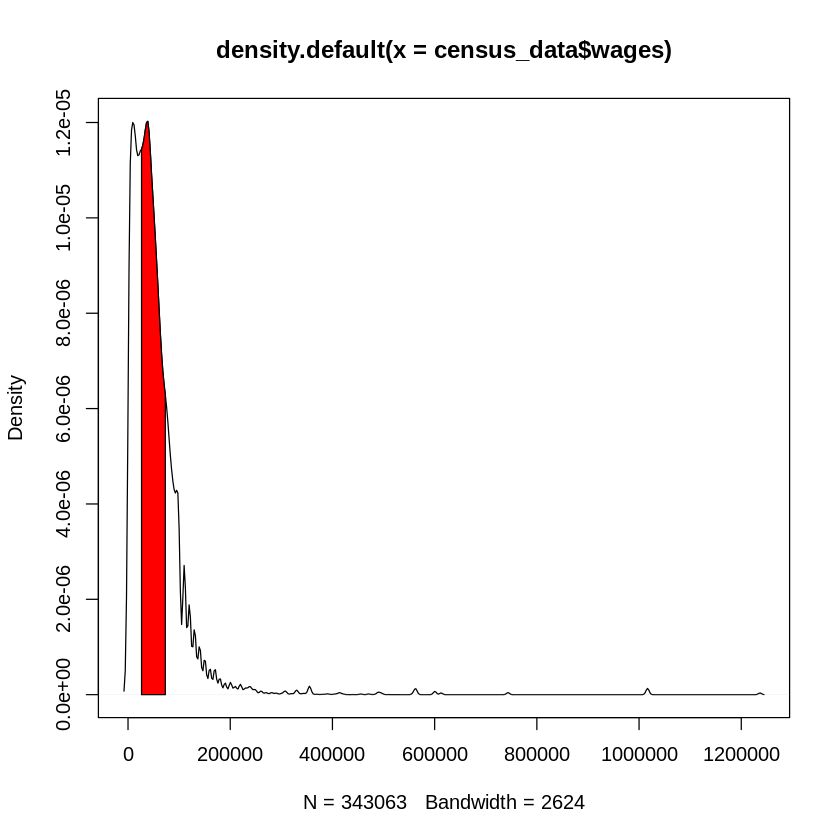

In [5]:
density <- density(census_data$wages)
plot(density)

# Telling R how to read our upper and lower bounds
l <- min(which(density$x >= 25000))
h <- max(which(density$x < 75000))

# Visualizing our specified range in red 
polygon(c(density$x[c(l, l:h, h)]),
        c(0, density$y[l:h], 0),
        col = "red")

#### Cumulative Density Function (CDF)
When we have a variable which is rankable, we can define a related object: the **Cumulative Density Function (CDF)**.  The CDF  for both discrete and continuous random variables is the probability that the random variable is less than or equal to a particular value. Naturally, this means that the CDF must necessarily be an increasing function. Think of the example of rolling a dice. $F(1)$ would indicate the the probability that a 1 was rolled. $F(2)$ would indicate the probability that a 2 **or lower** was rolled. Evidently, $F(2)$ would be greater than $F(1)$. 

Therefore, if we have a variable $X$ that can have take the value of $x$ the CDF is is the probability that $X$ will take a value less than or equal to $x$. A CDF can only take values between 0 and 1: this is because the total probability that the random variable is less or equal to the biggest value of the variable is 100% or 1 while the probability that the random variable is less or equal to the smallest value of the variable is 0% or 0. 

If we use the lowercase $f(y)$ to represent the PDF of $y$, then by convention we use the uppercase $F(y)$ to represent the CDF of $y$.


Mathematically, since $f_{X}(x)$ denotes the probability density function of $X$, then the probability that  $X$  falls between  $a$  and  $b$  where  $a \leq b$  is:

$$\mathrm{P}(a \leq X \leq b) = \left(\int_{a}^{b} f_{X}(x) \; dx\right)$$

We know that the entire X variable falls between 2 values if the probability of x falling in between them is 1. Therefore $X$'s CDF curve is:

$$\mathrm{P}(−∞ \le X \le ∞) = \left(\int_{−∞}^{∞} f_{X}(x) \; dx\right) = 1$$

Below we've used a scatterplot to visualize empirical CDF of the continuous variable `wages`. From the graph below we can tell that most people earn between 0-200000 as the probability of people's wages being less than or equal to 200000 is over 80%.

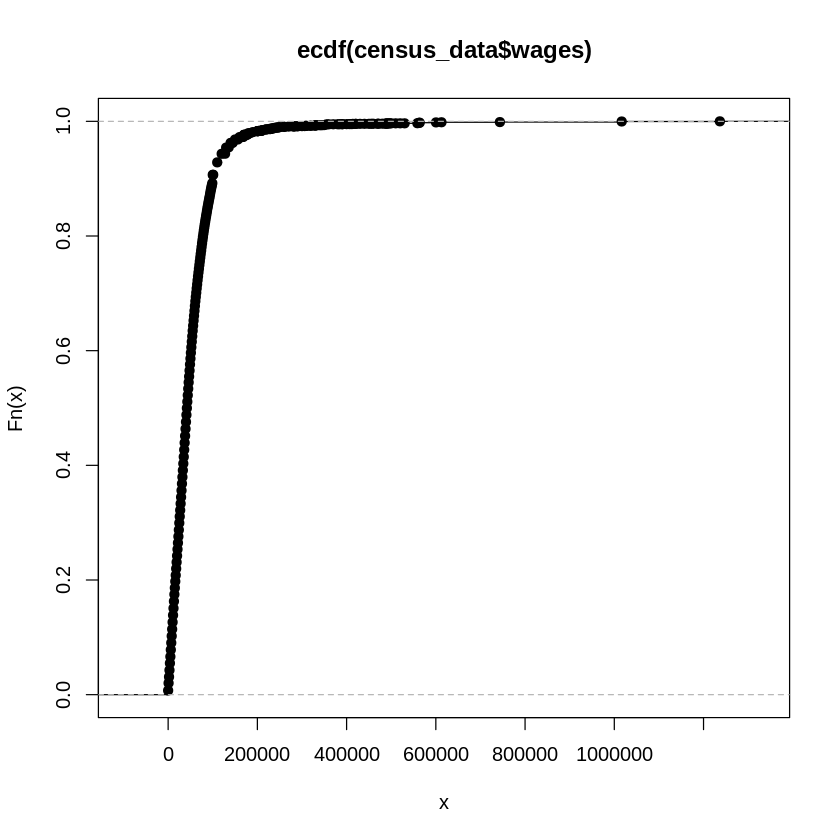

In [11]:
p <- ecdf(census_data$wages)

# plot CDF
plot(p)

#### Joint Probability Distribution

So far, we've looked at distributions for single random variables. However, we can also use distributions to analyze the probability of multiple random variables taking on certain values. Let's say we have two random variables, $X$ and $Y$. The **joint distribution** is the probability distribution on all possible values that $X$ and $Y$ can take on.


As an example, lets suppose both $X$ and $Y$ are discrete random variable which can take on values from 1-3, with the following joint probability table (X on vertical axis, and Y on horizontal):

|   | 1   | 2   | 3   |
|---|-----|-----|-----|
| 1 | 0   | 1/6 | 1/6 |
| 2 | 1/6 | 0   | 1/6 |
| 3 | 1/6 | 1/6 | 0   |

Above, we've created a joint distribution for the two discrete random variables, $X$ and $Y$. Notice the probabilities will sum to 1, as some combination of both $X$ and $Y$ will always occur.

Every joint distribution can be represented by a PDF and CDF, just like single random variables. The formal notation of a PDF for two jointly distributed random variables is below.

 $$f(x, y) = Prob (X = x, Y = y)$$

where $f(x, y)$ is the joint probability density that the random variable $X$ takes on a value of $x$ and the random variable $Y$ takes on a value of $y$ simultaneously.

The PDF for jointly distributed random variables would be, in this case, are the values recorded in the example table above. For example the PDF of an immigrant only speaking french $Prob(X=1, Y =2) = 1/6$.

The CDF for jointly distributed random variables follows the exact same logic as with single variables as well. It just instead represents the probability of multiple variables taking on values less than those specified all at once. This is quite non-sensical for two discrete random variables such as `immstat` and `kol`, but we can imagine the CDF of two jointly distributed random variables being much more interpretable if both of those variables are continuous (i.e. `wages` and `mrkinc`). The formal notation of a CDF for two jointly distributed random variables is below.

> $$F(x, y) = Prob({X \leq x}, {Y \leq y})$$ <br>

where $F(x, y)$ is the joint cumulative probability that the random variable $X$ takes on a value less than or equal to $x$ and the random variable $Y$ takes on a value less than or equal to $y$ simultaneously.

#### Marginal Probability Distribution 

If we add up all of the joint probabilities from the same row or the same column, we arrive at another concept known as the **marginal distribution**. This is essentially probability density function for each individual random variable. It gives the probability of one random variable taking on a series of different values, and it is found from utilizing the joint probabilities in our table above. We can represent the marginal probability density function as follows:

> $$f_{x}(x) = \sum_{y} Prob(X = x, Y = y)$$ <br>

where we sum across all possible joint probabilities of $X$ and $Y$ for a given value of $X$. Identical logic holds for the marginal probability density function of the random variable $Y$ as well.

An example will make this more clear. If we wanted the marginal empirical probability distribution function of the $X$ random variable, we would need to find the marginal probability for all possible values of $X$. 


For $X=1$, the marginal probability is the sum of all joint probabilities in that corresponding row: 1/6 + 1/6 = 1/3

#### Conditional Probability Distribution 

The **conditional distribution** function gives us the probability of seeing a host of values for one random variable conditional on a specified value of another random variable, given the two random variables are jointly distributed.

We can think about conditional probabilities mathematically. We will use the following formula to find the conditional probability density function:

> $$f(x | y) = \frac {Prob ((X = x) \bigcap (Y = y))} {Prob(Y = y)}$$

where $f(x | y)$ represents the conditional probability that the random variable $X$ will take on a value of $x$ when the random variable of $Y$ takes on a value of $y$. The $\bigcap$ symbol simply represents the case that both $X$ = $x$ and $Y$ = $y$ simultaneously (a joint probability) - we can read this symbol as "given that". One caveat to this equation is that the marginal probability that $Y = y$ must not be 0, else this conditional probability will be undefined.


Let's say we want to find the conditional probability of $X=1$ given $Y=2$. Recall the unconditional probability that $Y=1$ = 1/3. The conditional probability, given $Y=1$ will therefore be the probability of $X=1$ AND $Y=2$ divided by the probability that $Y=2$: (1/6) / (1/3) = 1/2.

One important point to consider is that of **statistical independence of random variables**. Two random variables are independent if and only if their joint probability of occurrence equals the product of their marginal probabilities for all possible combinations of values of the random variables. In mathematical notation, this means that two random variables are statistically independent if and only if:

> $$f(x, y) = f_{x}(x) f_{y}(y)$$

We can check for statistical independence of our jointly distributed random variables, $X$ and $Y$, quite quickly by consulting our table up above. Try to deduce whether these variables are independent yourself by multiplying combinations of marginal probabilities to see if they match the joint probability in the corresponding cell.

Throughout these explanations, we have continually referred to the joint, marginal and conditional distribution of two discrete random variables; however, ***one or both of these variables can be continuous***. We focused on discrete random variables since they are much easier to represent in table format. Just imagine trying to create a table of joint probabilities for two jointly distributed continuous random variables: there would be near infinite cells, each of which would have a joint probability of about 0! Nonetheless, all of the same logic applies to continuous random variables. The only difference is that we often refer to mathematical formulas when finding the marginal and conditional probabily functions for these random variables, since their PDFs and CDFs can be represented by mathematical functions (provided they fit the mathematical conditions of a PDF we outlined earlier).

One last important point to remember is that ***we can have more than two jointly distributed random variables***. We may want to represent the probability of 3, 4, or an even larger number of variables taking on certain values at once. While this is possible, it is not easy to represent graphically or in table format. That is why we have stuck to investigating two jointly distributed random variables in this notebook. However, you should keep this in mind as you progress in this course.

Now is your turn to work on some exercises which will test your understanding of the material presented in this notebook!

#### Exercise 1

Let the random variable $X$ denote the time (in hours) a person waits for their flight. This person can wait up to 2 hours for this flight. 

##### Question 1

Is $X$ a discrete or continuous random variable? 

In [ ]:
answer_1 <- "..." # your answer of "discrete" or "continuous" in place of ...

test_1()

<span style="color:red">Explain your reasoning here:

##### Question 2

Say a potential probability density function representing this random variable (from the above flight example) is the following:

$$ f(x) = \begin{cases}
x & \text{if } 0 \leq x \leq 1,\\
2 - x  & \text{if } 1 \leq x \leq 2,\\
0  & \text{otherwise}
\end{cases}$$

Is this a valid PDF?

In [ ]:
answer_2 <- "..." # your answer of "yes" or "no" in place of ...

test_2()

<span style="color:red">Explain your reasoning here:

##### Question 3

What is the probability of a person waiting up to 1.5 hours for their flight? Answer to 3 decimal places. **Hint**: this is not the same as the probability of waiting precisely 1.5 hours.

In [ ]:
# your code here

answer_3 <- ... # your answer for the cumulative probability (in decimal format, i.e. 95% = 0.95) here

test_3()

#### Exercise 2

Let's return to our `joint_table` for the joint distribution of discrete random variables `immstat` and `kol`. 

In [ ]:
joint_table

##### Question 1

What is the probability that someone is both an immigrant and knows both English and French? Answer to 3 decimal places.

In [ ]:
answer_4 <- ... # your answer for the probability (in decimal format, i.e. 95% = 0.95) here

test_4()

##### Question 2

What is the probability that someone is an immigrant given that they know only English? Answer to 3 decimal places.

In [ ]:
# your code here

answer_5 <- ... # your answer for the probability (in decimal format, i.e. 95% = 0.95) here

test_5()

##### Question 3

Why is it difficult to graph a joint probability distribution function (either density or cumulative) for these two variables in Jupyter? Which type of probability density function can we easily graph in Jupyter for jointly distributed random variables?

<span style="color:red">Explain your reasoning here:

#### Exercise 3

Let the random variable $Y$ be uniformly distributed on the range of values [20, 80].

##### Question 1

What is the probability of $Y$ taking on the value of 30? Answer to 3 decimal places. You may use a graph to help you.

In [ ]:
# your code here

answer_6 <- ... # your answer for the probability (in decimal format, i.e. 95% = 0.95) here

test_6()

##### Question 2

What is the probability of $Y$ taking on a value of 60 or more? Answer to 3 decimal places.

In [ ]:
answer_7 <- ... # your answer for the probability (in decimal format, i.e. 95% = 0.95) here

test_7()

##### Question 3

What would happen to this probability if $Y$ was expanded to be uniformly distributed on the range of values [20, 100]?

In [ ]:
answer_8 <- "..." # your answer of "it would increase" or "it would decrease" in place of "..."

test_8()

<span style="color:red">Explain your reasoning here:

#### Exercise 4

Now let $Z$ be a normally distributed random variable representing the length of a piece of classical music (in minutes), with a mean of 5 and standard deviation of 1.5.

##### Question 1

What is the probability that a given piece will last between 3 and 7 minutes? Answer to 3 decimal places. You may use code to help you.

In [ ]:
# your code here

answer_9 <- ... # your answer for the probability (in decimal format, i.e. 95% = 0.95) here

test_9()

##### Question 2

If $Z$ were to remain normally distributed and have the same standard deviation, but the mean piece length was changed to 3 minutes, how would this probability change?

In [ ]:
answer_10 <- "..." # your answer of "it would increase" or "it would decrease" in place of "..."

test_10()

<span style="color:red">Explain your reasoning here:

##### Question 3

Returning to our original $Z$ variable (with mean 5), if the standard deviation were to decrease to 1, how would this probability change?

In [ ]:
answer_11 <- "..." # your answer of "it would increase" or "it would decrease" in place of "..."

test_11()

<span style="color:red">Explain your reasoning here:

## Part 2: Parametric Distributions


You may have noticed that all of the examples we used were for _empirical_ distributions.  This was because we don't really know what the _population_ distributions which make up the census actually are.  However, many statistics _do_ have known distributions which are very important to recognize and understand.

Now that we have a strong background in random variables and the various probability functions which represent them, we can look at the three most famous examples of distributions:

* uniform distribution
* normal (or Gaussian) distribution 
* student $t$-distribution

These are called **parametric** distributions because (as we will see) they can be described by a set of numbers called _parameters_.  For instance, the normal distribution's two _parameters_ are the mean and standard deviation.

All the parametric distributions explained in this module are analyzed using four R commands. The four commands will start with the prefixes:
- `d` for “density”: it produces the probability density function (PDF)
- `p` for “probability”: it produces the cumulative distribution function (CDF)
- `q` for “quantile”: it produces the inverse cumulative distribution function, also called the quantile function
- `r` for “random”: generates random numbers from a particular parametric distribution

### Uniform Distribution

A continuous variable has a **uniform distribution** if all values have the same likelihood of occurring. Therefore, the variable's density curve is a rectangle, with constant height across the interval and 0 height elsewhere. Since the area under the curve must be equal to 1, the length of the interval determines the height of the curve. A good example of a random event that has a uniform distribution is rolling a dice. Rolling each of the six numbers is equally likely. 

Let's see with a variable what this kind of distribution might look like.   To do this, we will generate random values from this distribution using the function `runif()`. This command is written as `runif(n, min = , max = )`, where `n` is the number of observations, and `max` and `min` provide the interval between which the random variables are picked from. 

#### Simulation

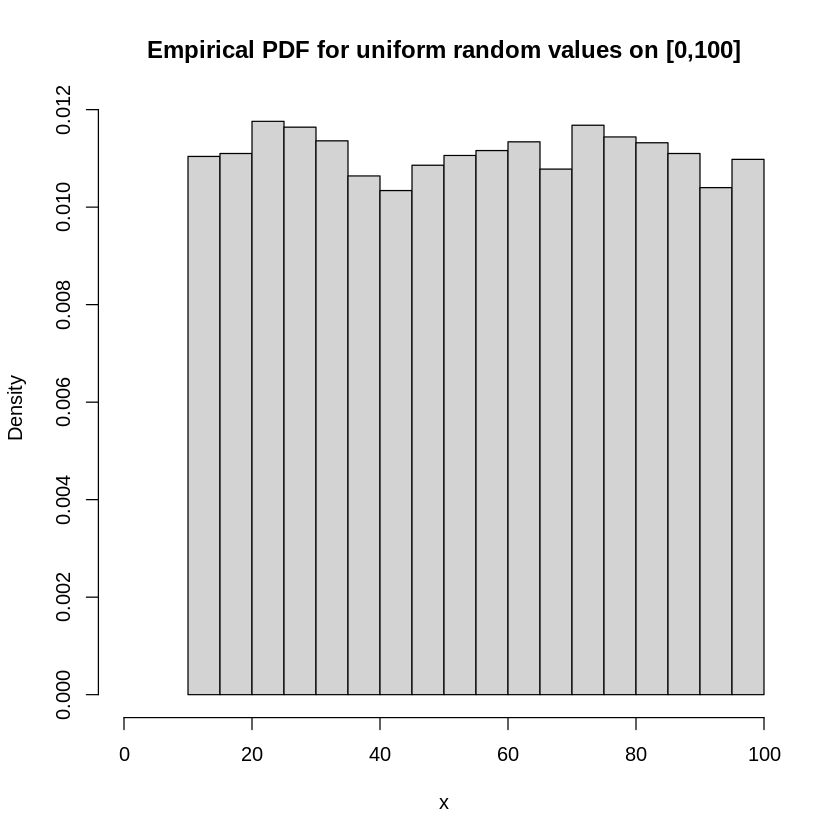

In [12]:
example_unif <- runif(10000, min = 10, max = 100)
hist(example_unif, freq = FALSE, xlab = 'x', xlim = c(0,100), main = "Empirical PDF for uniform random values on [0,100]")

You may be wondering why all the bars aren't the exact same height if each number is equally likely to be drawn. This is because of random chance. Each number is within the specified range is equally likely to be drawn, but out of random chance some ranges of numbers are being drawn at higher frequencies than others. If you re-run the previous code cell, you will see that the shape of the distribution changes each time. 

Since we know what this distribution is, we can plot the population distribution, and visualize it.

For instance, suppose we have a  uniform random variable $X$ defined on the interval $(10,50)$. Since the interval has a width of 40, so the curve must have a height of $\frac{1}{40} = 0.024$ over the interval and 0 elsewhere. The probability that $X \leq 25$ is the area between 10 and 25, or $(25-10)\cdot 0.025 = 0.375$.   Naturally, these kinds of calculations are much easier to do using R!

#### PDF
The `dunif()` function calculates the uniform probability density function for a variable and can also calculate a specific value's density.

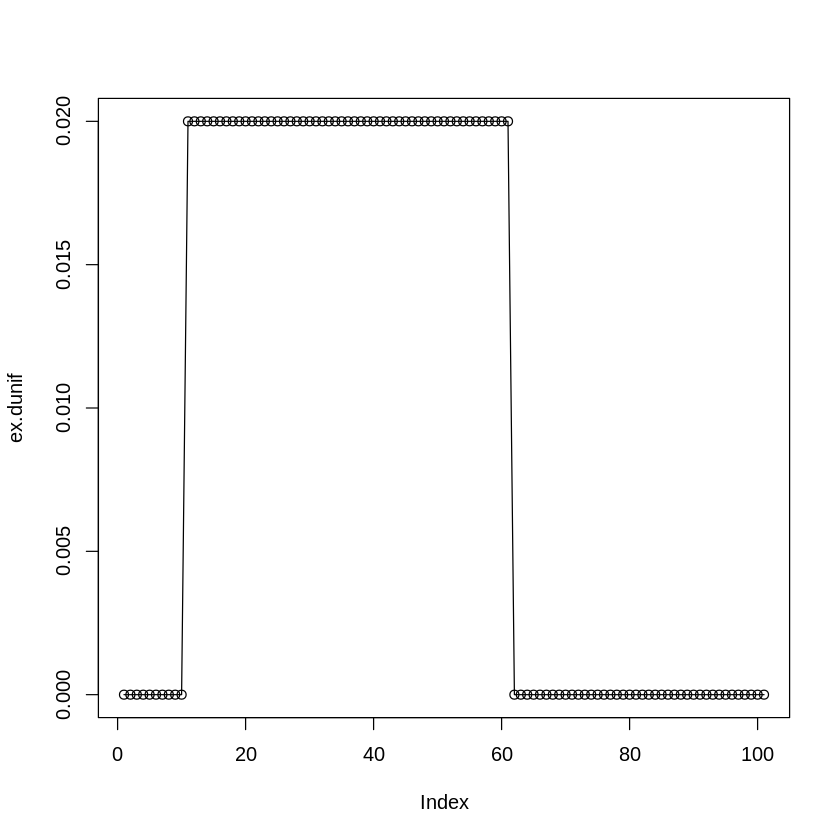

In [1]:
range <- seq(0, 100, by = 1) # creating a variable with a uniform distribution
ex.dunif <- dunif(range, min = 10, max = 60) # calculating the PDF of the variable "range"
plot(ex.dunif, type = "o") # plotting the PDF

#### CDF

The `punif()` function calculates the uniform cumulative distribution function for the set of values.

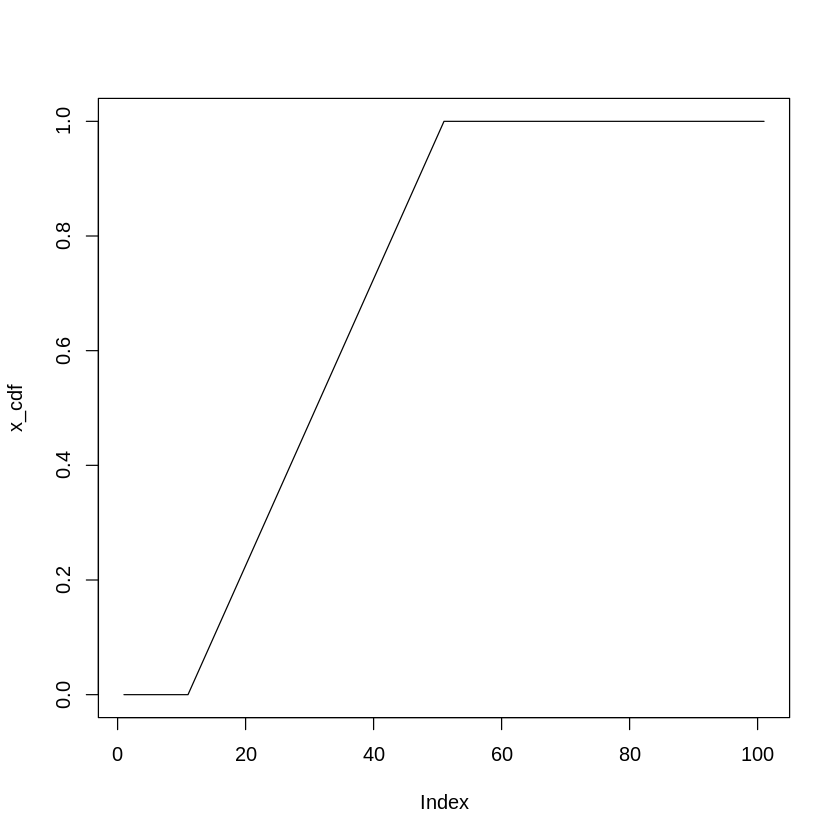

In [2]:
x_cdf <- punif(range,      # Vector of quantiles
      min = 10,            # Lower limit of the distribution (a)
      max = 50,            # Upper limit of the distribution (b)
      lower.tail = TRUE,   # If TRUE, probabilities are P(X <= x), or P(X > x) otherwise
      log.p = FALSE)       # If TRUE, probabilities are given as log
plot(x_cdf, type = "l")

The `qunif()` function calculates, based on the cumulative probability, where a specific value is located in the distribution of density and helps us access the quantile distribution probability values from the data.

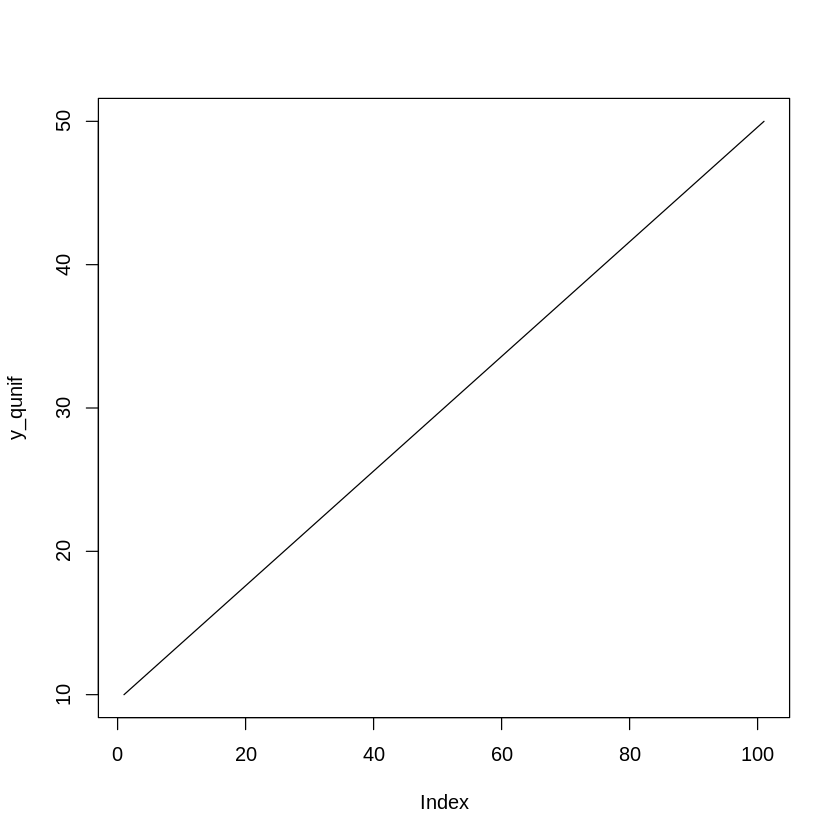

In [3]:
quantiles <- seq(0, 1, by = 0.01)
y_qunif <- qunif(quantiles, min = 10, max = 50)    
plot(y_qunif, type = "l")

### Normal (Gaussian) Distribution 
We first saw the normal distribution in the _Central Tendency notebook_ and we are now better equipped to understand its nuances. The normal distribution is a special type of distribution for a number of reasons: it is fundamental to many statistic processes. Many random variables in natural and social sciences are normally distributed. Height, birth weight or SAT scores all follow a normal distribution. 

This kind of distribution is referred to as "normal" because it's distribution is symmetrical and bell-shaped.  A normal distribution is **parameterized** by its mean $\mu$  and its standard deviation $\sigma$, and it is expressed as $N(\mu,\sigma)$. Without knowing the mean and the standard deviation one cannot calculate the normal distribution.

The PDF has a complex equation, which can be written as:

$$f(x; \mu, \sigma) = \displaystyle \frac{x^{-(x-\mu)^{2}/(2\sigma^{2})}}{\sigma\sqrt{2\pi}}$$

A **standard normal distribution** is is a special normal distribution, characterized for having a mean equal to zero and a standard deviation equal to 1 ($\mu=0$  and  $\sigma=1$). Hence, $N(0,1)$:
 - Standard normal variables are often denoted by $Z$
 - Usually, the standard normal PDF is denoted by  $\phi$ and the standard normal CDF is denoted by $\Phi$

To generate simulated normal random variables, we can use the `rnorm()`this function. It is similar to the `runif()` function we saw earlier:

#### Simulation

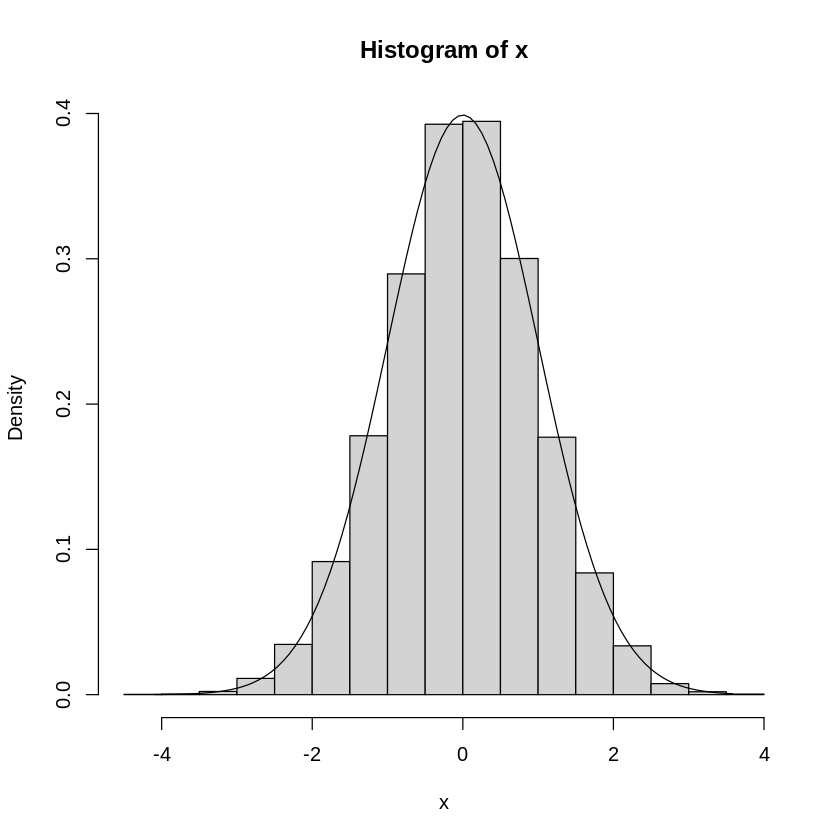

In [4]:
 x <- rnorm(10000, # number of observations
            mean = 0, # mean
            sd = 1) # sd
 hist(x, probability=TRUE) # the command hist() creates a histogram using variable x,
 xx <- seq(min(x), max(x), length=100)
 lines(xx, dnorm(xx, mean=0, sd=1))

#### PDF

As with the uniform distribution, we can use `dnorm` to plot the standard normal pdf.

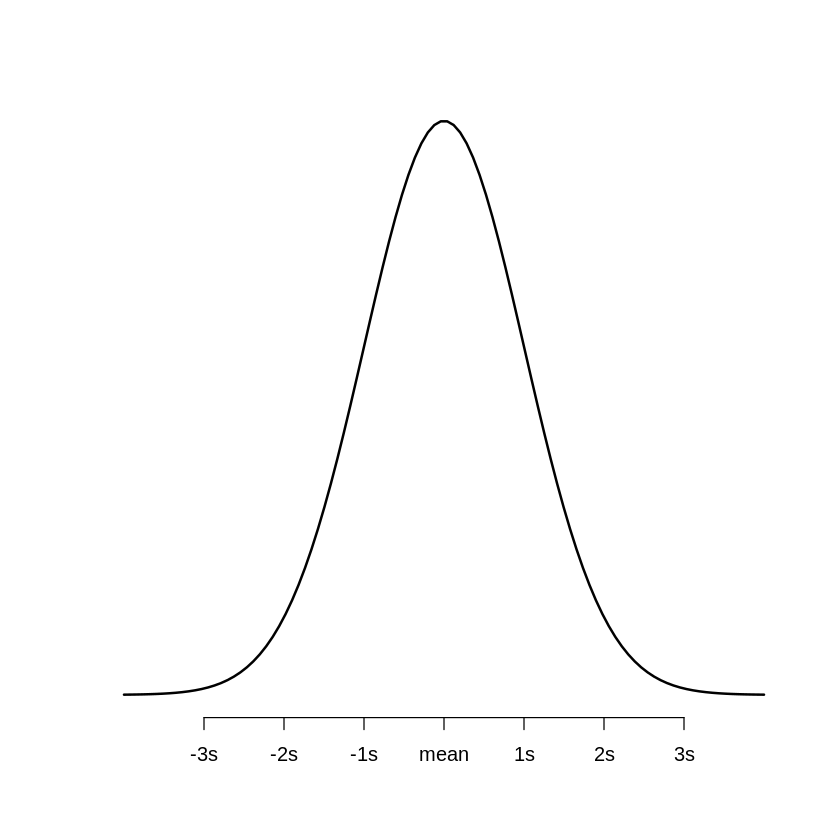

In [5]:
 # create a sequence of 100 equally spaced numbers between -4 and 4
 x <- seq(-4, 4, length=100)

 # create a vector of values that shows the height of the probability distribution
 # for each value in x
 y <- dnorm(x)

 # plot x and y as a scatterplot with connected lines (type = "l") and add
 # an x-axis with custom labels
 plot(x,y, type = "l", lwd = 2, axes = FALSE, xlab = "", ylab = "")
 axis(1, at = -3:3, labels = c("-3s", "-2s", "-1s", "mean", "1s", "2s", "3s"))

We have used the random values generated to observe the bell shaped distribution of this random variable. As it can be seen in the graph, the mean is zero (that is where all the values converge) and the standard deviation is one therefore, this is a standard normal PDF. We can change the numbers of mean and sd in the `rnorm()` command to make the distribution not standard as well. 

#### CDF

`pnorm()` - this function can give the entire CDF curve of a normally distributed random *variable* as well as give the probability of a normally distributed random *number* to be less than the value of a given number. 

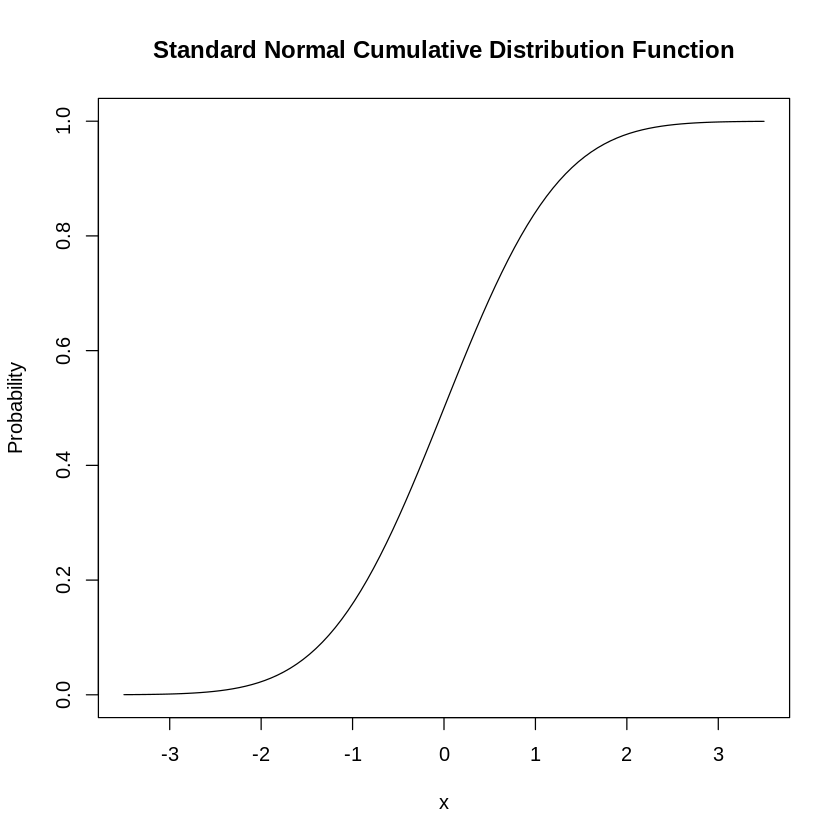

In [6]:
 curve(pnorm(x), 
       xlim = c(-3.5, 3.5), 
       ylab = "Probability", 
       main = "Standard Normal Cumulative Distribution Function")

In [7]:
 pnorm(27.4, mean=50, sd=20) # gives you the CDF at that specific location
 pnorm(27.4, 50, 20)

[1] 0.1292381

[1] 0.1292381

The`qnorm()` function takes the density value and gives a number with a matching cumulative value. Therefore, `qnorm()` gives the the inverse of the CDF.
`qnorm()` can also create a percent point function (ppf). A ppf is the inverse curve of the cumulative distribution function. The CDF of a specific value is the probability of a normally distributed value of a random variable to be less than the value of a **given number**. For the percent point function, we start with that probability and then compute the corresponding **given number** for the cumulative distribution. In other words the answer of `qnorm()` will be the number where the area before it is X% of the sample.

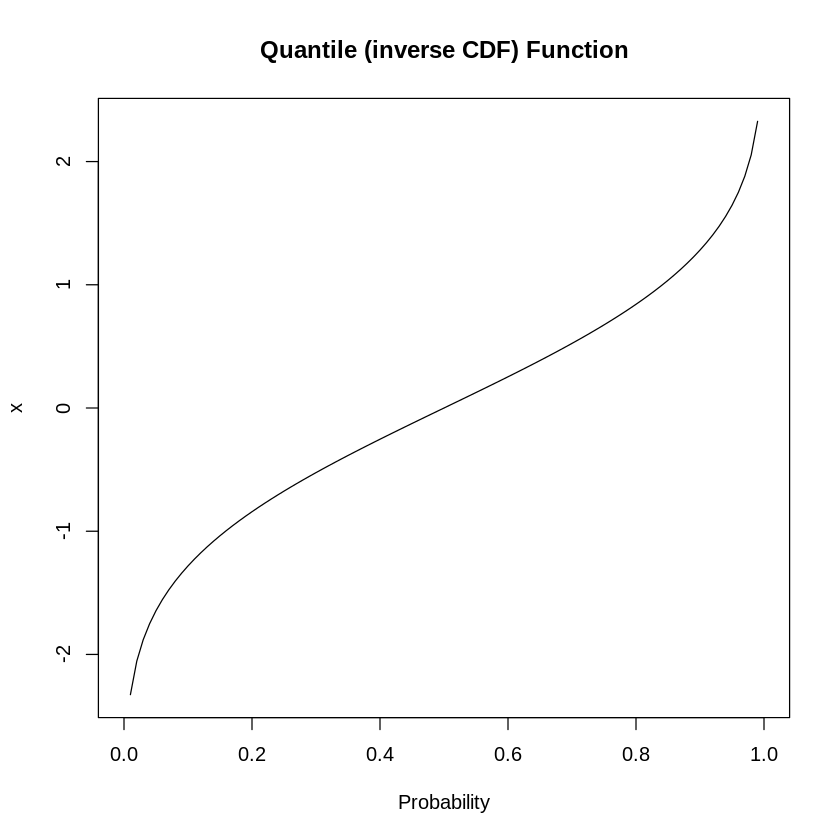

In [8]:
  curve(qnorm(x), 
       xlim = c(0, 1), 
       xlab = "Probability",
       ylab = "x", 
       main = "Quantile (inverse CDF) Function")

In [9]:
 qnorm(0.95, mean=100, sd=15)

[1] 124.6728

Finally, the function `dnorm()` gives the height of the probability distribution at each point for a given mean and standard deviation. The height of the pdf curve is the density. This function can also be used to calculate the entire density curve, as observed in the command *lines(xx, dnorm(xx, mean=0, sd=1))*

In [10]:
 dnorm(100, mean=100, sd=15)

[1] 0.02659615

### Student's $t$-Distribution 

The **Student's $t$-distribution** is a continuous distribution that arises when estimating the sampling distribution of a normally distributed population in situations where the sample size is small and the population's standard deviation is unknown. This may seem esoteric, but it's actually really important: we will explore the concept of sampling distributions in a later module. 

The $t$-distribution is based on the number of observations and the degrees of freedom. A degree of freedom ($\nu$) refers to the maximum number of logically independent values, which are values that have the freedom to vary, in the data sample. In other words, it is the number of values that need to be known in order to know all of the values. For example, imagine you have 3 values which have an average of 5. If you sample two of the values and they turn out to be 4, and 5, even without sampling the final value, there is no freedom in the last value.


In the case of the $t$-distribution the degree(s) of freedom can be represented as $\nu = n-1$, with $n$ being the sample size. When  $\nu$  is large, the $t$-distribution begins to look like a standard normal distribution. This approximation between standard normal and $t$-distribution can start being noticed around $\nu \geq 30$.

As with the uniform and normal distribution, to generate random values that together have a t-distribution we add the prefix `r` to the name of the distribution, `rt()`.

#### Simulation

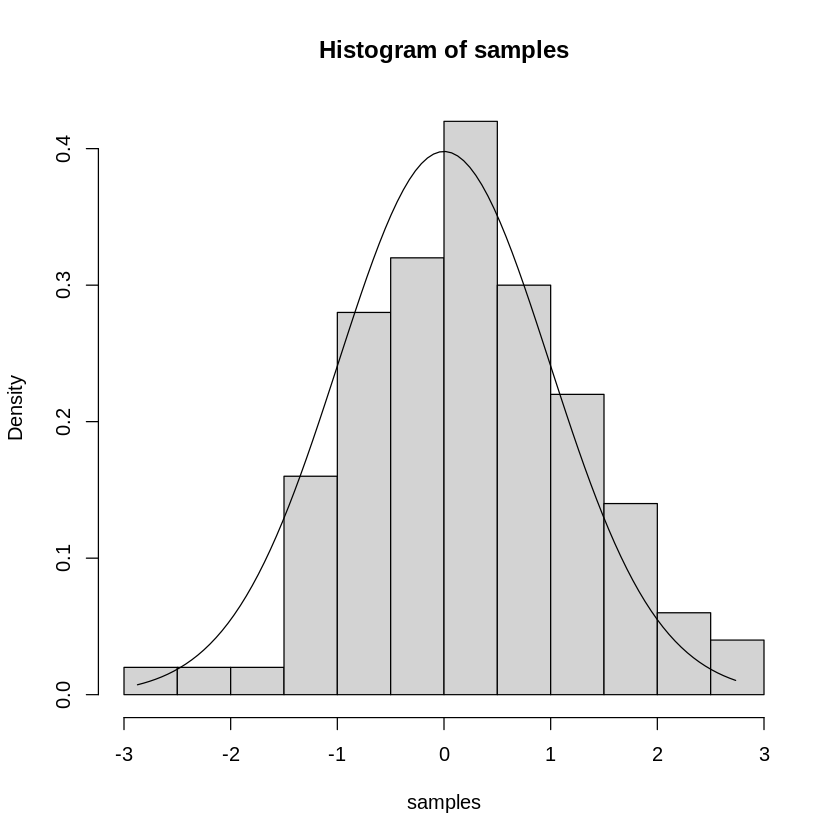

In [11]:
 n <- 100
 df <- n - 1
 samples <- rt(n, df)
 hist(samples,breaks = 20, freq = FALSE)
 xx <- seq(min(samples), max(samples), length=100)
 lines(xx, dt(xx, df))

A very interesting characteristic of the t-distribution that can be observed from this graph is that, although it is bell-shaped and symmetrical like the normal distribution, the t-distribution is not as thin as a normal distribution. That means that the data is more spread out than a normal distribution a characteristic which is explained by the central limit theorem (CLT) and law of large numbers (LLN), concepts that will be explained in a future module.

#### PDF

The function `dt()` calculates the PDF of a particular variable or the density of a particular value of a variable, depending on the sample size and degrees of freedom. In the examples shown below we will be using the variable `ex.tvalues` which is a sequence of numbers ranging from -4 to 4 with increments of 0.01. Therefore there are 800 numbers generated which means the degrees of freedom = 799.

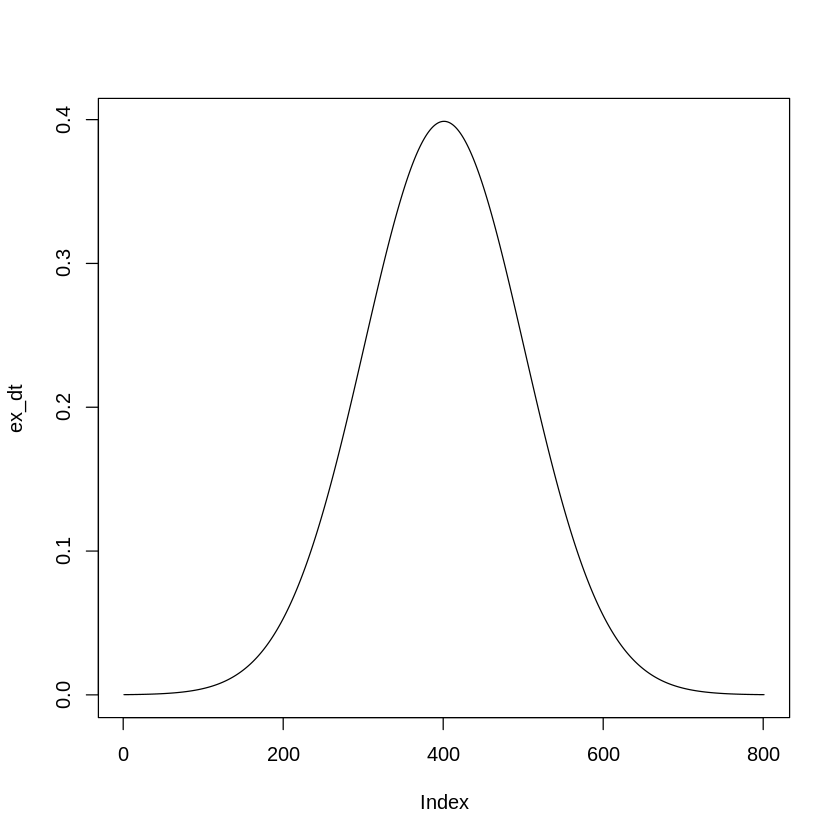

In [12]:
 ex.tvalues <- seq(- 4, 4, by = 0.01)  # generating a sequence of number 
 ex_dt <- dt(ex.tvalues, df = 799) # calculating the PDF
 plot(ex_dt, type="l")     

#### CDF

The `pt()` function calculates the entire CDF curve of a t-distributed random *variable* and gives the probability of a t-distributed random *number* that is less that the value of a given number. 

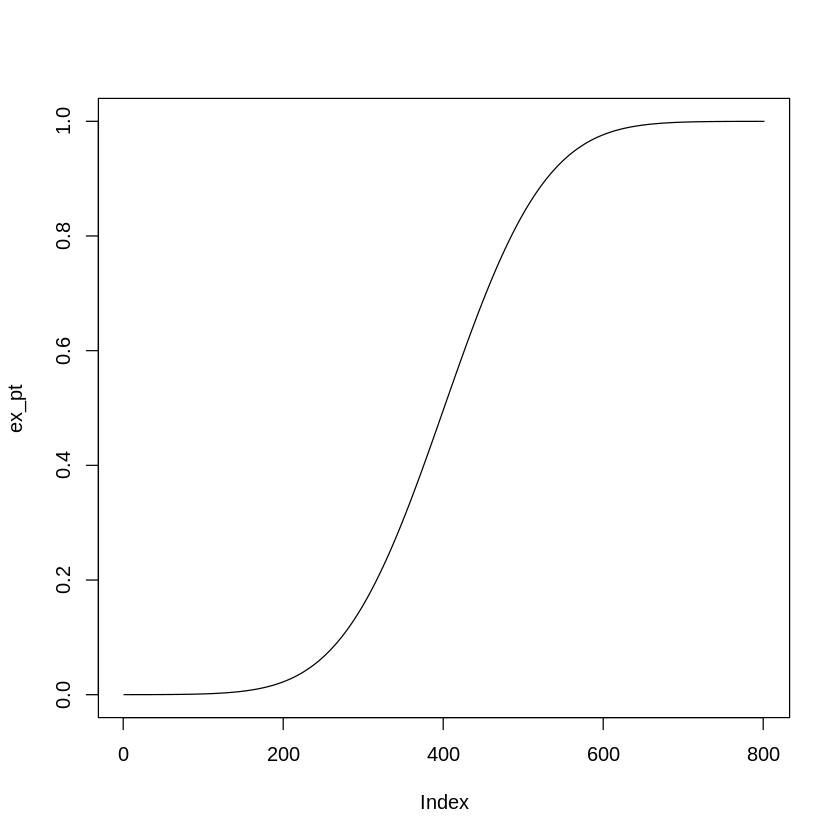

In [13]:
 ex_pt <- pt(ex.tvalues, df = 799)   # calculating CDF
 plot(ex_pt, type = "l") 

`qnorm()`- this function takes the probability value and gives a number whose cumulative value matches the probability value.
`qnorm()` can also create a percent point function (ppf).

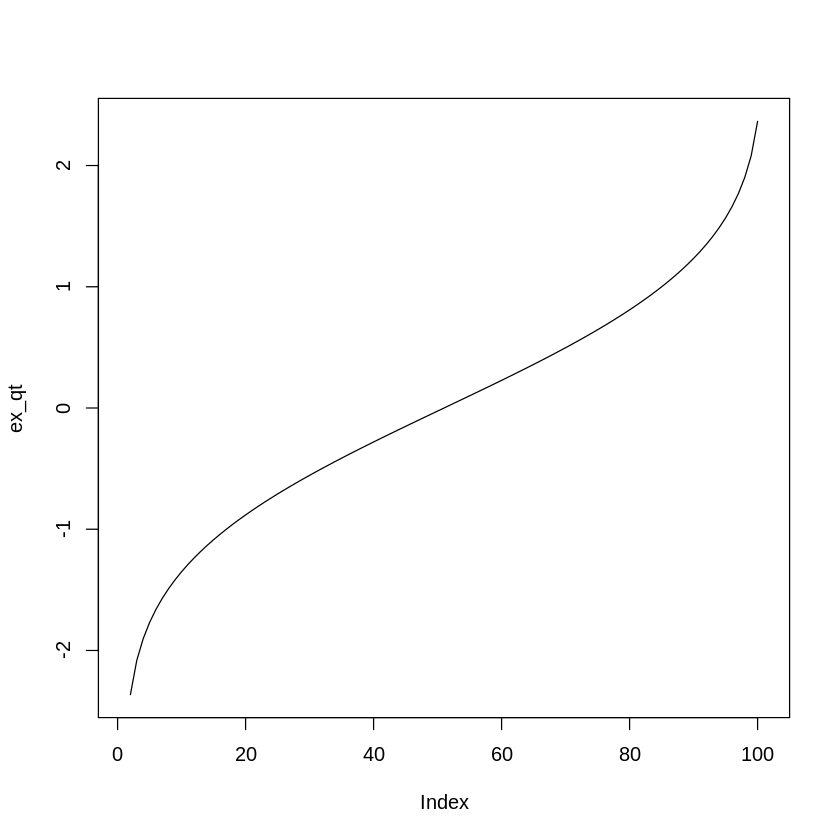

In [14]:
 ex.qtvalues <- seq(0, 1, by = 0.01)  # generating a sequence of number 
 ex_qt <- qt(ex.qtvalues, df = 99)  # calculating the ppf
 plot(ex_qt, type = "l") # plotting the ppf 

Beyond these three common distributions, there are many other types of distributions which relatively accurately fit data. Examples include chi-square distribution or f-distribution. However, in rare cases, we may encounter variables for which we cannot fit a distribution. Perhaps the data is distributed sporadically and is not well approximated by any common distribution. In these cases, we describe it as a non-parametrical distribution.

## Part 3: Exercises


### Exercise 12

Which of the following random variables are most likely to be uniformally distributed.  
  
**A.** The height of a UBC student  
**B.** The wages of a UBC student  
**C.** The birthday of a UBC student  

In [15]:
# Enter your answer here as "A", "B", or "C"

answer_12 <- "..."
test_12(answer_12)

ERROR: Error in test_12(answer_12): could not find function "test_12"


### Exercise 13

Which of the following random variables are most likely to be normally distributed.  
  
**A.** The height of a UBC student   
**B.** The grades of a particular course  
**C.** The birthday of a UBC student    

In [16]:
# Enter your answer here as "A", "B", or "C"

answer_13 <- "..."
test_13(answer_13)

ERROR: Error in test_13(answer_13): could not find function "test_13"


### Exercise 14

Given our uniform distribution `example_unif`, find $F(72)$. Note that you don't need to calculate the exact probability given the distribution. To answer the question, you only need to know that this random variable is uniformly distributed for values between 10 and 100. 

In [17]:
# Enter your answer as an integer below. Your answer should only have one decimal place. 

answer_14 <- ...
test_14()

ERROR: Error in eval(expr, envir, enclos): '...' used in an incorrect context


### Exercise 15 

Assume we have a standard normal distribution. Find $F(0)$

In [18]:
# Enter your answer as an integer below. Your answer should only have one decimal place

answer_15 <- ...
test_15()

ERROR: Error in eval(expr, envir, enclos): '...' used in an incorrect context


### Exercise 16

Let's assume we have a students $t-$distribtion that is nearly coincident to the corresponding normal distribution. What must be true?

**A.** The degrees of freedom parameter must be very large.   
**B.** The degrees of freedom parameter must be very small.  
**C.** The degrees of freedom parameter must be equal to the mean of the normal distribution.   

In [19]:
# Enter your answer here as "A", "B", or "C"

answer_16 <- "..."
test_16(answer_16)

ERROR: Error in test_16(answer_16): could not find function "test_16"
